# Gravity Prediction

In [18]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [4]:
# import dataset


data = pd.read_csv("Copy of Gravity_Datas_SW_Nigeria_Prof_LMOjigi(1).csv")

data.sample(5).T

,9,294,47,168,107
PID,P10,P295,P48,P169,P108
l,5.54,5.4861,5.17,4.3,6.25
f,6.53,10.3889,6.75,7.69,7.25
h(m),98.8,331.9,88.1,271.3,278.3
g(mgal),978063.2,978108.7,978088.8,978067.3,978055.7
FreeAir,-4.9,11.3,12.8,26.7,27.5
Bouguer,-15.9,-25.8,3.0,-3.7,-3.6


In [5]:
data.columns = ['s/no','latitude', 'longitude', 'height',
               'gravity', 'freeair', 'bouguer']

In [6]:
data.corr(numeric_only=True)

,latitude,longitude,height,gravity,freeair,bouguer
latitude,1.000000,0.248598,0.270320,-0.350148,-0.445945,-0.664517
longitude,0.248598,1.000000,0.383193,0.191370,-0.286315,-0.613260
height,0.270320,0.383193,1.000000,-0.765512,0.411297,-0.499592
gravity,-0.350148,0.191370,-0.765512,1.000000,-0.281544,0.414145
freeair,-0.445945,-0.286315,0.411297,-0.281544,1.000000,0.584114
bouguer,-0.664517,-0.613260,-0.499592,0.414145,0.584114,1.000000


Examine relationships 

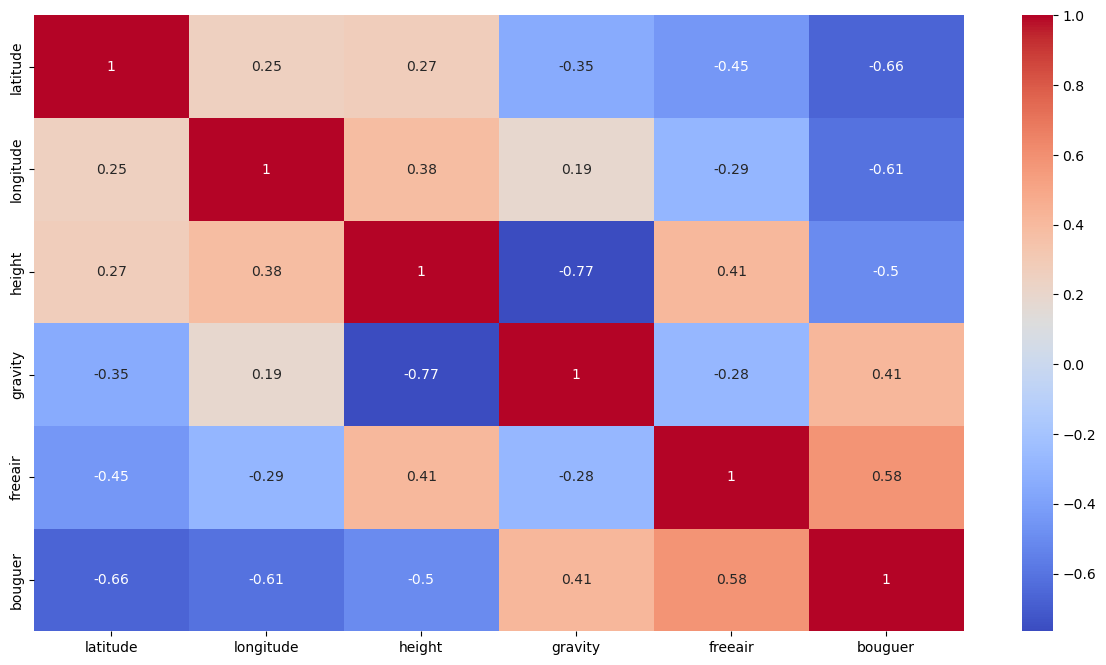

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm',
           annot=True);

In [8]:
X_train,X_tes = train_test_split(data, random_state=42, test_size=0.25)

In [9]:
X_train.shape[0], X_tes.shape[0]

(226, 76)

In [10]:
X_train

,s/no,latitude,longitude,height,gravity,freeair,bouguer
286,P287,5.8194,10.0069,158.3,978135.4,-3.5,-21.2
281,P282,5.7500,9.7708,306.4,978100.3,14.3,-20.0
197,P198,4.9000,8.0000,476.8,978036.3,51.6,-1.7
158,P159,4.8500,7.6300,422.1,978042.9,50.3,3.1
164,P165,3.4500,7.6800,171.9,978106.3,35.3,16.0
...,...,...,...,...,...,...,...
188,P189,3.8600,7.9000,224.0,978086.9,26.6,1.6
71,P72,3.2200,6.9500,68.9,978114.3,28.1,20.4
106,P107,5.5200,7.2500,314.7,978048.3,31.4,-3.8
270,P271,5.1181,9.3403,168.5,978121.6,5.7,-13.1


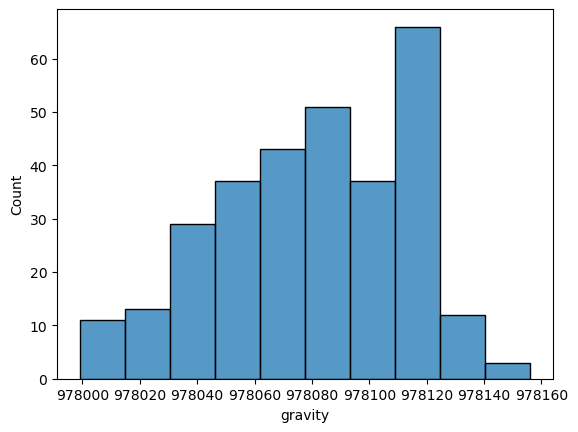

In [11]:
sns.histplot(data=data,x=data.gravity);

In [13]:
train_input = X_train.drop(columns=['gravity', 's/no'])
test_input = X_tes.drop(columns=['gravity', 's/no'])
train_target = X_train.gravity
test_target = X_tes.gravity

Build Model and Make Prediction 

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(train_input, train_target)

prediction = linear_reg.predict(test_input)
mae = mean_absolute_error(test_target, prediction)

rmse = np.sqrt(mean_squared_error(test_target, prediction))
print(f'Mean Square Error is: {round(rmse,3)} and Mean Absolute Error is: {round(mae,3)}')

Mean Square Error is: 1.8 and Mean Absolute Error is: 1.349


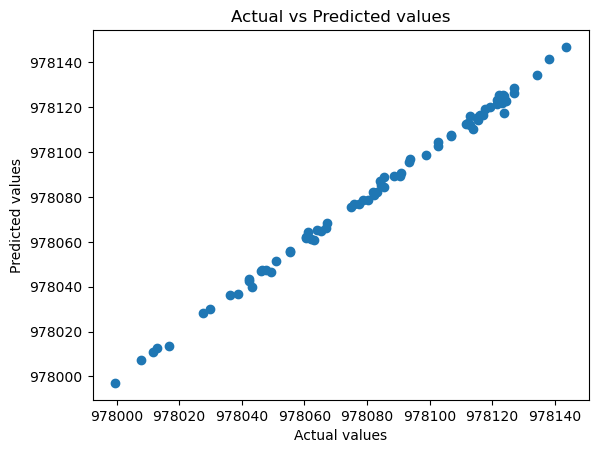

In [19]:
plt.scatter(test_target, prediction)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

In [20]:
# pip install streamlit mlem

# Save the Model

In [21]:
import joblib

In [22]:
gravity_data = {
    'model':linear_reg,
    'input_col': train_input.columns,
    'target_col': 'gravity'
}

In [23]:
joblib.dump(gravity_data,'gravity_prediction.joblib')

['gravity_prediction.joblib']

In [24]:
gravity_df = joblib.load('gravity_prediction.joblib')

In [25]:
gravity_pred = gravity_df['model'].predict(test_input)
mean_absolute_error(test_target, gravity_pred)

1.3492021518805384

# Make Prediction on Single Input

In [26]:
from typing import Literal

def pred_input(latitude: Literal[float, -90, 90], longitude: Literal[float, -90, 90], 
               height, freeair, bouguer):
    
    input_dict = {
        'latitude': latitude,
        'longitude': longitude,
        'height': height,
        'freeair': freeair,
        'bouguer': bouguer
    }
    
    input_df = pd.DataFrame([input_dict])
    prediction_single = linear_reg.predict(input_df)[0]
    
    return prediction_single

In [29]:
pred_input(latitude=4.3, longitude=10.3, 
           height=200, freeair=-20, 
           bouguer=-2)

977883.6334437147